In [5]:
import numpy as np
import matplotlib.pyplot as plt
from utils.geotif_io import readTiff, writeTiff
from utils.lay_stack import lay_stack
from utils.imgShow import imgShow
from utils.get_dem import get_dem
from glob import glob
from utils.imgs_in_extent import imgs_in_extent


### 1. Check the dem generated by one aster stereo image.

In [17]:
path_aster_1 = 'data/aster-stereo/SETP-2020/aster-reproj/VNIR_2020.10452579/VNIR-LaySta_utm.tif'
path_aster_2 = 'data/aster-stereo/SETP-2020/aster-reproj/VNIR_2020.20040811/VNIR-LaySta_utm.tif'
path_aster_3='data/aster-stereo/SETP-2006/aster-reproj/VNIR_2006.46043299/VNIR-LaySta_utm.tif'
path_dem_aster_1 = 'data/aster-stereo/SETP-2020/aster-dem/VNIR_2020.10452579/run-DEM.tif'
path_dem_aster_2 = 'data/aster-stereo/SETP-2020/aster-dem/VNIR_2020.20040811/run-DEM.tif'
path_dem_aster_3 = 'data/aster-stereo/SETP-2006/aster-dem/VNIR_2006.46043299/run-DEM.tif'



In [18]:
aster_1, aster_1_info = readTiff(path_aster_1)
aster_2, aster_2_info = readTiff(path_aster_2)
aster_3, aster_3_info = readTiff(path_aster_3)
dem_aster_1, dem_aster_1_info = readTiff(path_dem_aster_1)
dem_aster_2, dem_aster_2_info = readTiff(path_dem_aster_2)
dem_aster_3, dem_aster_3_info = readTiff(path_dem_aster_3)



Text(0.5, 1.0, 'Generated aster DEM 3')

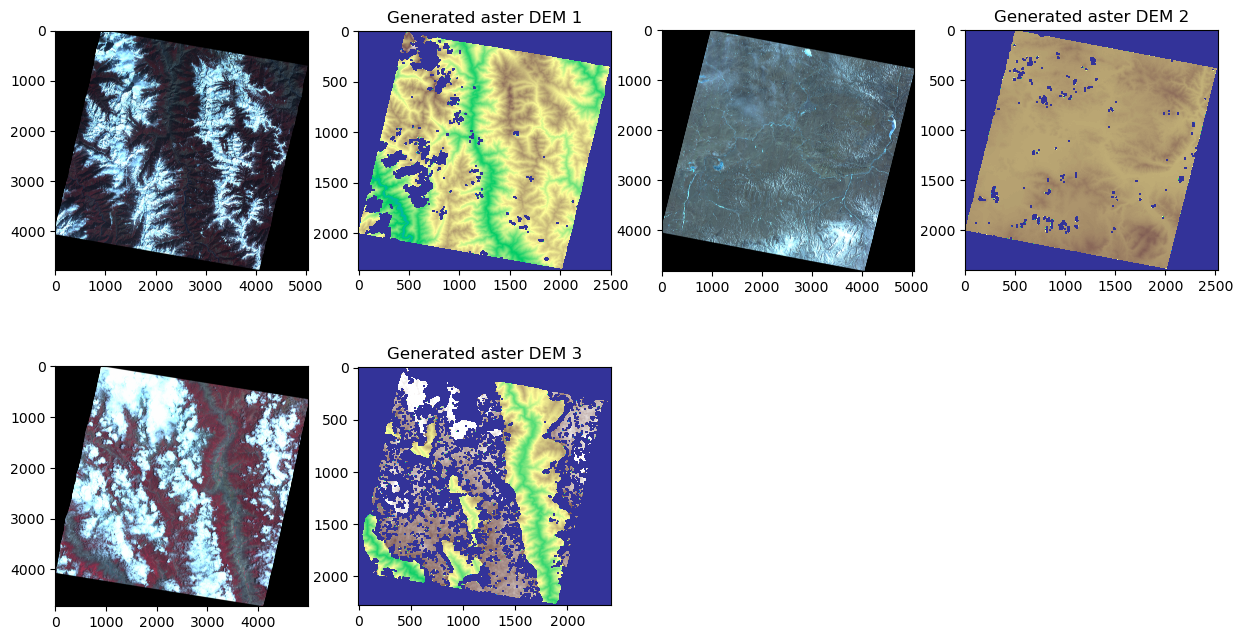

In [20]:
plt.figure(figsize=(15,8))
plt.subplot(2,4,1)
imgShow(aster_1)
plt.subplot(2,4,2)
plt.imshow(dem_aster_1, vmin=0, vmax=7000, cmap='terrain')
plt.title('Generated aster DEM 1')
plt.subplot(2,4,3)
imgShow(aster_2)
plt.subplot(2,4,4)
plt.imshow(dem_aster_2, vmin=0, vmax=7000, cmap='terrain')
plt.title('Generated aster DEM 2')
plt.subplot(2,4,5)
imgShow(aster_3)
plt.subplot(2,4,6)
plt.imshow(dem_aster_3, vmin=0, vmax=7000, cmap='terrain')
plt.title('Generated aster DEM 3')




### 2. Check the dem tile generated by aster stereo image.

In [27]:
# bottoms=(31 31 31 31 31 30 30 30 30 30 30 30 29 29 29 29 29 29 29 29 28 28 28 28 28 27 27 27)
# lefts=  (91 92 93 94 95 91 92 93 94 95 96 97 91 92 93 94 95 96 97 98 94 95 96 97 98 96 97 98)
tile_b, tile_l = 30, 94
path_tile_2007 = 'data/aster-stereo/SETP-2007/tiles-dem/tile-'+str(tile_b)+'-'+str(tile_l)+'/dems_mosaic_wgs84_subs.tif'
path_tile_2020 = 'data/aster-stereo/SETP-2008/tiles-dem/tile-'+str(tile_b)+'-'+str(tile_l)+'/dems_mosaic_wgs84_subs.tif'
path_tile_srtm = 'data/dem-data/srtm-c/tiles/tile_'+str(tile_b)+'_'+str(tile_l)+'.tif'


In [28]:
dem_tile_2007, dem_tile_2007_info = readTiff(path_tile_2007)
dem_tile_2020, dem_tile_2020_info = readTiff(path_tile_2020)
srtm_tile_2020, srtm_tile_2020_info = readTiff(path_tile_srtm)


Text(0.5, 1.0, 'tiled DEM 2020')

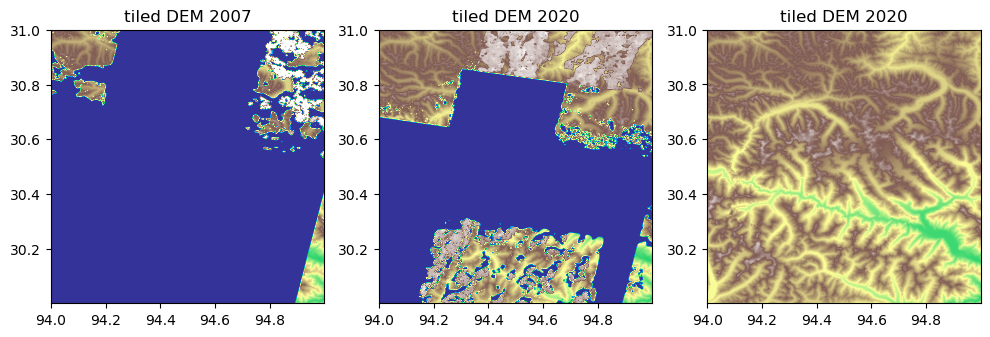

In [29]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(dem_tile_2007, vmin=0, vmax=7000, extent=dem_tile_2007_info['geoextent'], cmap='terrain')
plt.title('tiled DEM 2007')
plt.subplot(1,3,2)
plt.imshow(dem_tile_2020, vmin=0, vmax=7000, extent=dem_tile_2020_info['geoextent'], cmap='terrain')
plt.title('tiled DEM 2020')
plt.subplot(1,3,3)
plt.imshow(srtm_tile_2020, vmin=0, vmax=7000, extent=srtm_tile_2020_info['geoextent'], cmap='terrain')
plt.title('tiled DEM 2020')
